## Check MPI & IPyParallel setup

First we import parallel python and ipcmagic which allows us to spinup a cluster of Python engines within an MPI context.

In [1]:
import numpy as np
import ipcmagic
import ipyparallel as ipp
import matplotlib
import matplotlib.pyplot as plt

We now start a cluster of 4 workers (MPI ranks). This might take a while to finish.

**Important: This cell should only be run once at kernel startup. If you rerun everything in the notebook, this cell should be skipped. The only time this cell should be run, is immediately after re-starting the kernel or after having stopped the cluster with `%ipcluster stop`.**

In [12]:
%ipcluster start -n 4

  0%|          | 0/4 [00:00<?, ?engine/s]

The desired output here should be:

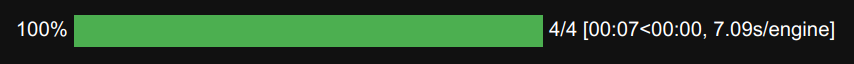

If you get a different message, try again. The IPCluster is currently slightly buggy, showing no progress. Once you see "IPCluster is already running." after rerunning the cell above, your good to go. If any problems persist, reach out to us and we will try and help get things fixed.

In [13]:
rc = ipp.Client()
rc.ids
dv = rc[:]
dv.activate()
dv.block = True
print("Running IPython Parallel on {0} MPI engines".format(len(rc.ids)))
%px from mpi4py import MPI
%px mpi_rank = MPI.COMM_WORLD.Get_rank()
dv_main = dv.pull('mpi_rank').index(0)

Running IPython Parallel on 4 MPI engines


The desired output here must be:
```
Running IPython Parallel on 4 MPI engines
```

In [4]:
%%px
import time
import timeit
import numpy as np
from mpi4py import MPI

Since we enabled `%%px` for this cell, the commands will be run on *all* of the workers. Let's import the mpi4py package as MPI and then print the number of ranks and the rank ID on every worker.

In [5]:
%%px
from mpi4py import MPI

comm = MPI.COMM_WORLD
mpi_size = comm.Get_size()
mpi_rank = comm.Get_rank()

print(mpi_size)
print(mpi_rank)

[stdout:0] 4
0


[stdout:1] 4
3


[stdout:3] 4
2


[stdout:2] 4
1


Since we are receiving standard output from each of the ranks, it is marked using <tt>[stdout:NN]</tt> where <tt>NN</tt> is the number of the rank.

If we do not enable `%%px` we are no longer sending commands to the workers, but we will be running commands on frontend again.

In [6]:
print(10)

10


Re-enabling `%%px` again, we are running commands to the workers again. 

In [7]:
%%px
print(10)

[stdout:0] 10


[stdout:3] 10


[stdout:1] 10


[stdout:2] 10


In order to stop the cluster, we need to make sure that we are running commands on the frontend and then issueing the `%ipcluster stop` command.

In [8]:
import time
rc.shutdown()
time.sleep(1) # Wait a little bit for engines to clean up.
rc.close()
%ipcluster stop

IPCluster stopped.
